Climate analysis: 
    Vacation dates May 25-June 10


In [1]:
# Python SQL toolkit and Object Relational Mapper
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [2]:
# Create engine using the `demographics.sqlite` database file
### BEGIN SOLUTION
engine = create_engine("sqlite:///hawaii.sqlite")
### END SOLUTION

In [3]:
# Declare a Base using `automap_base()`
### BEGIN SOLUTION
Base = automap_base()
### END SOLUTION

In [4]:
# Use the Base class to reflect the database tables
### BEGIN SOLUTION
Base.prepare(engine, reflect=True)
### END SOLUTION

In [5]:
# Print all of the classes mapped to the Base
### BEGIN SOLUTION
Base.classes.keys()
### END SOLUTION

['hawaii_measurement', 'hawaii_station']

In [6]:
# Assign the demographics class to a variable called `Demographics`
### BEGIN SOLUTION
Measurements = Base.classes.hawaii_measurement
Stations = Base.classes.hawaii_station
### END SOLUTION

In [7]:
# Create a session
### BEGIN SOLUTION
session = Session(engine)
### END SOLUTION

In [8]:
# Use the session to query Demographics table and display the first 5 locations
### BEGIN SOLUTION
for row in session.query(Measurements).limit(5).all():
    print(row)
### END SOLUTION

In [9]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
### BEGIN SOLUTION
results_measurement = session.query(Measurements.station,Measurements.date,Measurements.prcp, Measurements.tobs).all()
### END SOLUTION
results_measurement

[('USC00519397', '2010-01-01', 0.08, 65),
 ('USC00519397', '2010-01-02', 0.0, 63),
 ('USC00519397', '2010-01-03', 0.0, 74),
 ('USC00519397', '2010-01-04', 0.0, 76),
 ('USC00519397', '2010-01-07', 0.06, 70),
 ('USC00519397', '2010-01-08', 0.0, 64),
 ('USC00519397', '2010-01-09', 0.0, 68),
 ('USC00519397', '2010-01-10', 0.0, 73),
 ('USC00519397', '2010-01-11', 0.01, 64),
 ('USC00519397', '2010-01-12', 0.0, 61),
 ('USC00519397', '2010-01-14', 0.0, 66),
 ('USC00519397', '2010-01-15', 0.0, 65),
 ('USC00519397', '2010-01-16', 0.0, 68),
 ('USC00519397', '2010-01-17', 0.0, 64),
 ('USC00519397', '2010-01-18', 0.0, 72),
 ('USC00519397', '2010-01-19', 0.0, 66),
 ('USC00519397', '2010-01-20', 0.0, 66),
 ('USC00519397', '2010-01-21', 0.0, 69),
 ('USC00519397', '2010-01-22', 0.0, 67),
 ('USC00519397', '2010-01-23', 0.0, 67),
 ('USC00519397', '2010-01-24', 0.01, 71),
 ('USC00519397', '2010-01-25', 0.0, 67),
 ('USC00519397', '2010-01-26', 0.04, 76),
 ('USC00519397', '2010-01-27', 0.12, 68),
 ('USC0051

In [10]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
### BEGIN SOLUTION
results_station = session.query(Stations.station,Stations.name,Stations.latitude, Stations.longitude,Stations.elevation).all()
### END SOLUTION
results_station

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:

# Load the results into a pandas dataframe. Set the index to the `emoji_id`
### BEGIN SOLUTION
hawaii_measurement_df = pd.DataFrame(results_measurement[:], columns=['Station', 'Date', 'Percipitation','Temperature'])
hawaii_measurement_df.set_index('Station', inplace=True, )
hawaii_measurement_df

,Date,Percipitation,Temperature
Station,,,
USC00519397,2010-01-01,0.08,65
USC00519397,2010-01-02,0.00,63
USC00519397,2010-01-03,0.00,74
USC00519397,2010-01-04,0.00,76
USC00519397,2010-01-07,0.06,70
USC00519397,2010-01-08,0.00,64
USC00519397,2010-01-09,0.00,68
USC00519397,2010-01-10,0.00,73
USC00519397,2010-01-11,0.01,64


In [12]:
hawaii_station_df = pd.DataFrame(results_station[:], columns=['Station', 'StationName', 'Latitude','Longitute','Elevation'])
hawaii_station_df.set_index('Station', inplace=True, )
hawaii_station_df 

,StationName,Latitude,Longitute,Elevation
Station,,,,
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


### Percipitation Analysis

In [13]:
#Filter for Date and percipitation column and select rows from 2017

percipitation_2017 = hawaii_measurement_df[['Date','Percipitation']]
#percipitation_2017.iloc[percipitation_2017[2017-12-13]]

In [14]:
percipitation_2017_df = pd.DataFrame(percipitation_2017[(percipitation_2017['Date'] >= '2016-08-01')\
                                & (percipitation_2017['Date'] <= '2017-08-23')].set_index('Date'))
percipitation_2017_df



,Percipitation
Date,
2016-08-01,0.08
2016-08-02,0.05
2016-08-03,0.00
2016-08-04,0.04
2016-08-05,0.01
2016-08-06,0.00
2016-08-07,0.39
2016-08-08,0.02
2016-08-09,0.00


<IPython.core.display.Javascript object>


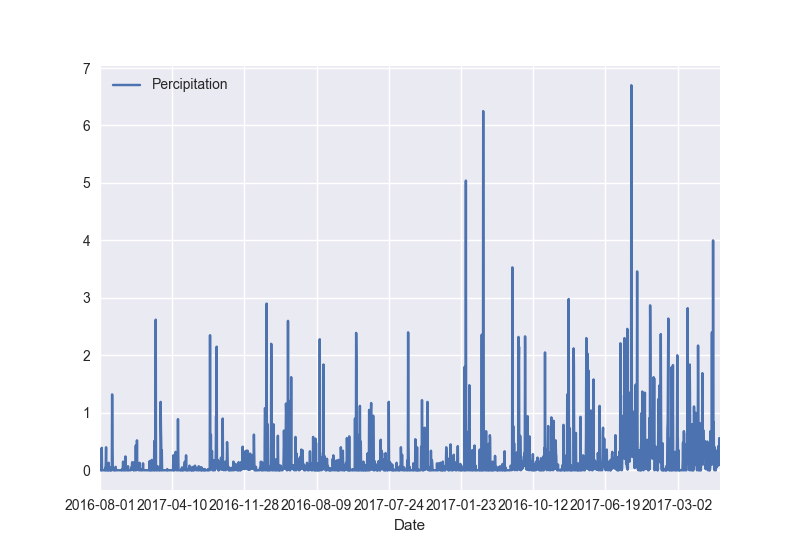

In [15]:
#df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

#df = percipitation_2017_df.cumsum()

percipitation_2017_df.cumsum()
percipitation_2017_df.plot()
plt.show()

In [16]:
percipitation_2017_df.describe()

,Percipitation
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


### Station Analysis


In [71]:
#Design a query to calculate the total number of stations.
#New DF grouped by station with new column 'count'

station = pd.DataFrame(hawaii_measurement_df.groupby('Station').count()).rename(columns={'Date':'Count'})

station_count = station[['Count']]
station_count 


,Count
Station,
USC00511918,1932
USC00513117,2696
USC00514830,1937
USC00516128,2484
USC00517948,683
USC00518838,342
USC00519281,2772
USC00519397,2685
USC00519523,2572


In [79]:
#Design a query to find the most active stations.
station_count.loc[(station_count['Count'] >= 2000)]

,Count
Station,
USC00513117,2696
USC00516128,2484
USC00519281,2772
USC00519397,2685
USC00519523,2572


In [73]:
#List the stations and observation counts in descending order
station_count.sort_values(['Count'],ascending=False, inplace=False, kind='quicksort', na_position='last')

,Count
Station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [74]:
#Which station has the highest number of observations?
station_count.iloc[:,0].idxmax()


'USC00519281'

In [86]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter for Date and temperature column and select rows from 2017
temperature_2017= hawaii_measurement_df[['Date','Temperature']]

temperature_2017_df = pd.DataFrame(temperature_2017[(temperature_2017['Date'] >= '2016-08-01')\
                                & (temperature_2017['Date'] <= '2017-08-23')].set_index('Date'))
temperature_2017_df.head()

,Temperature
Date,
2016-08-01,77
2016-08-02,78
2016-08-03,80
2016-08-04,80
2016-08-05,80


In [90]:
#Filter by the station with the highest number of observations.

station = pd.DataFrame(hawaii_measurement_df.groupby('Station').count()).rename(columns={'Date':'Count'})

station_count = station[['Count']]
station_count 

,Count
Station,
USC00511918,1932
USC00513117,2696
USC00514830,1937
USC00516128,2484
USC00517948,683
USC00518838,342
USC00519281,2772
USC00519397,2685
USC00519523,2572


<IPython.core.display.Javascript object>


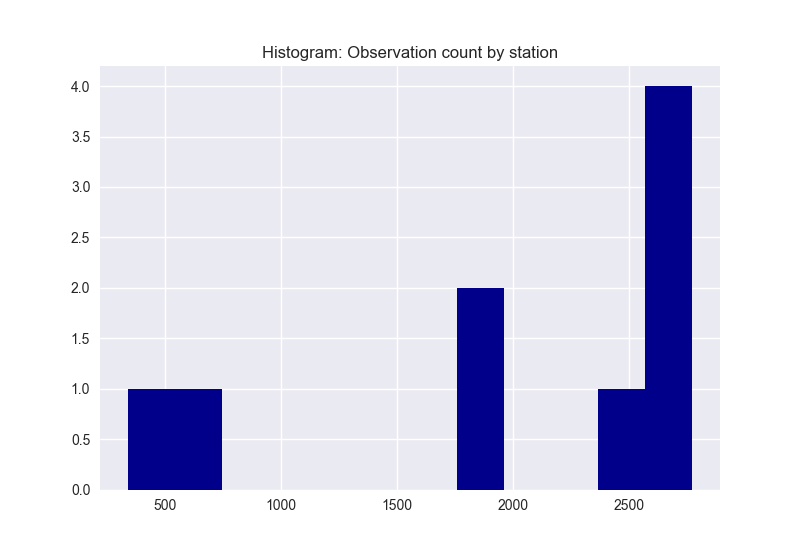

In [96]:
#Plot the results as a histogram with bins=12.
station_count["Count"].hist(bins=12, color="darkblue")
plt.title("Histogram: Observation count by station")
plt.savefig("Histogram Observation count by station")
plt.show()

### Temperature Analysis